<a href="https://colab.research.google.com/github/Pakhi27/Fashion-MnistDataset-CNN-Model/blob/main/FASHION_MNIST_DATASET_MLP_%26_CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FASHION MNIST DATASET-CNN


In [1]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for grpcio
  Running setup.py clean for grpcio
Failed to build grpcio
ERROR: Could not build wheels for grpcio, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

FASHION MNIST-CNN


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


In [2]:
# The shape of X_train depends on the data format (channels first or last) and preprocessing steps. However, it's commonly a 4-dimensional array in the format (num_images, height, width, channels).
# y_train contains integers between 0 and 9, where each number corresponds to a specific clothing category (e.g., 0 for T-shirt/top, 1 for Trouser, and so on).
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [4]:
print(train_labels[0:5])

[9 0 0 3 0]


In [6]:
# Convert into one hot encoded vector
print("categorical labels")
print(train_labels[0:5])

# make labels one hot encoded
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

print("one hot encoded labels")
print(train_labels[0:5])

categorical labels
[9 0 0 3 0]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [7]:
print("number of training examples:" ,train_images.shape[0])
print("number of test examples:" ,test_images.shape[0])

number of training examples: 60000
number of test examples: 10000


In [9]:
# The new Dataset API in TensorFlow 2.X allows you to define batch sizes as part of the dataset. It also has improved I/O characteristics, and is the recommended way of loading data. This allows you to iterate through subsets (batches) of the data during training. This is a common practice that improves performance by computing gradients over smaller batches. We will see this in action during the training step.
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(50)

In [ ]:
# Converting a 2-D image into a 1-D Vector

In [10]:

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(train_images.shape)

"flattened shape"
print(flatten(train_images).shape)

(60000, 28, 28)
(60000, 784)


In [11]:
# Weight tensor-10-This represents the number of output neurons in the layer. In MNIST, there are 10 possible fashion outfits (0-9), 784- This corresponds to the number of features in the input data. Since the MNIST dataset consists of 28x28 grayscale images, each image gets flattened into a 784-dimensional vector before feeding it into this fully-connected layer.Purpose: The elements of W represent the weights that connect each input feature (from the flattened image) to each output neuron. These weights are learned during the training process to capture the relationships between image features and fashion classes.
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor-Purpose: The elements of b represent the biases for each output neuron in the layer. Biases are essentially constants added to the weighted sum of the input features before applying the activation function. They allow the network to learn decision boundaries that might not be achievable with just weights alone.Overall, these weights and biases in the fully-connected layer play a crucial role in transforming the processed image features (extracted by convolutional layers) into class probabilities for digit recognition in the MNIST dataset.
b = tf.Variable(tf.zeros([10], tf.float32))

In [12]:
#Adding Weights and Biases to input
def forward(x):
    return tf.matmul(x,W) + b

In [ ]:
# Softmax Regression

In [13]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
# tf.argmax(softmax) finds the index of the element with the largest value in the softmax vector. This index corresponds to the category with the highest probability.
# .numpy() converts the index to a Python integer and prints it along with the message "category".
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [ ]:
# Now we can define our output layer

In [14]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [ ]:
# Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution.

In [ ]:
# Let's create a model function for convenience.

In [ ]:
# Cost function

In [15]:
# The flatten function likely transforms the input tensor x into a one-dimensional vector. This is a common preprocessing step in CNNs (Convolutional Neural Networks) where the input data might be multi-dimensional (e.g., images with height, width, and channels). Flattening reshapes the data into a single long list of values, suitable for feeding into fully-connected layers of the network.The activate function is likely defined elsewhere and is responsible for applying an activation function to the flattened input x. Activation functions introduce non-linearity into the model, allowing it to learn more complex relationships between features
def model(x):
    x = flatten(x)
    return activate(x)

In [18]:
# he provided code defines a function named cross_entropy that calculates the cross-entropy loss between true labels (y_label) and predicted labels (y_pred) and demonstrates its usage for an unoptimized model.
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(train_labels, model(train_images)).numpy()

138155.12

In [ ]:
# Type of optimization: Gradient Descent

In [19]:
# This line creates an optimizer object using tf.keras.optimizers.SGD. This indicates you're using SGD to update the weights (parameters) of your model during training.
# The optimizer is configured with a learning rate of 0.25. The learning rate controls how much the weights are adjusted in each training step based on the calculated loss.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [20]:
# Now we define the training step. This step uses GradientTape to automatically compute deriviatives of the functions we have manually created and applies them using the SGD optimizer.
# Calculates the loss for the current input data and labels.
# Uses TensorFlow's automatic differentiation to calculate the gradients of the loss with respect to the model's weights and biases.
# Applies the SGD update rule using the optimizer to adjust the weights and biases in a direction that minimizes the loss.
# Returns the calculated loss value.
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )
    return current_loss.numpy()

In [ ]:
# Training batches

In [24]:
# This code snippet defines a training loop for a machine learning model using TensorFlow, likely for an image classification task on the MNIST dataset (based on the size of the weight tensor W).
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
# Epochs: The outer loop iterates for epochs (10 in this case). Each iteration represents a training epoch where the model sees the entire training dataset once.
epochs = 8

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        #  This line calls the train_step function (defined elsewhere) with the current batch of data and labels. The train_step function likely performs a single training step, calculating the loss and updating the model's weights and biases.
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) )

    # after iterating through all batches in an epoch, this section calculates the overall loss for the entire training data using the cross_entropy function on the full x_train and y_train tensors. The result (current_loss) is appended to the loss_values list for tracking.
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( train_labels, model( train_images )).numpy()
    loss_values.append(current_loss)
    # correct_prediction: This line calculates the number of correct predictions on the entire training data for the current epoch. It compares the predicted class labels (using tf.argmax on the model's output for x_train) with the true labels (y_train).
    correct_prediction = tf.equal(tf.argmax(model(train_images), axis=1),
                                  tf.argmax(train_labels, axis=1))
    #  accuracy-accuracy: This line calculates the average accuracy (percentage of correct predictions) for the epoch by converting the boolean correct_prediction tensor to floats and taking the mean. The result (accuracy) is appended to the accuracies list for tracking.
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 500 loss: 563.9771
epoch  0 batch 1000 loss: 373.67868
end of epoch  0 loss 562072.8 accuracy 0.57885
epoch  1 batch 500 loss: 552.6205
epoch  1 batch 1000 loss: 375.82733
end of epoch  1 loss 559390.0 accuracy 0.57996666
epoch  2 batch 500 loss: 581.6074
epoch  2 batch 1000 loss: 341.76193
end of epoch  2 loss 568221.1 accuracy 0.57086664
epoch  3 batch 500 loss: 506.14145
epoch  3 batch 1000 loss: 366.03912
end of epoch  3 loss 538080.2 accuracy 0.5976833
epoch  4 batch 500 loss: 506.56873
epoch  4 batch 1000 loss: 348.88196
end of epoch  4 loss 535192.94 accuracy 0.60001665
epoch  5 batch 500 loss: 529.5941
epoch  5 batch 1000 loss: 340.43372
end of epoch  5 loss 533378.8 accuracy 0.60455
epoch  6 batch 500 loss: 519.6741
epoch  6 batch 1000 loss: 339.69003
end of epoch  6 loss 546246.75 accuracy 0.5945333
epoch  7 batch 500 loss: 543.1656
epoch  7 batch 1000 loss: 324.29657
end of epoch  7 loss 538252.9 accuracy 0.601


In [28]:
correct_prediction_train = tf.equal(tf.argmax(model(train_images), axis=1),tf.argmax(train_labels,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(test_images), axis=1),tf.argmax(test_labels, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.601
test accuracy 0.5921


In [ ]:
# The next two plots show the performance of the optimization at each epoch.

Text(0, 0.5, 'loss')

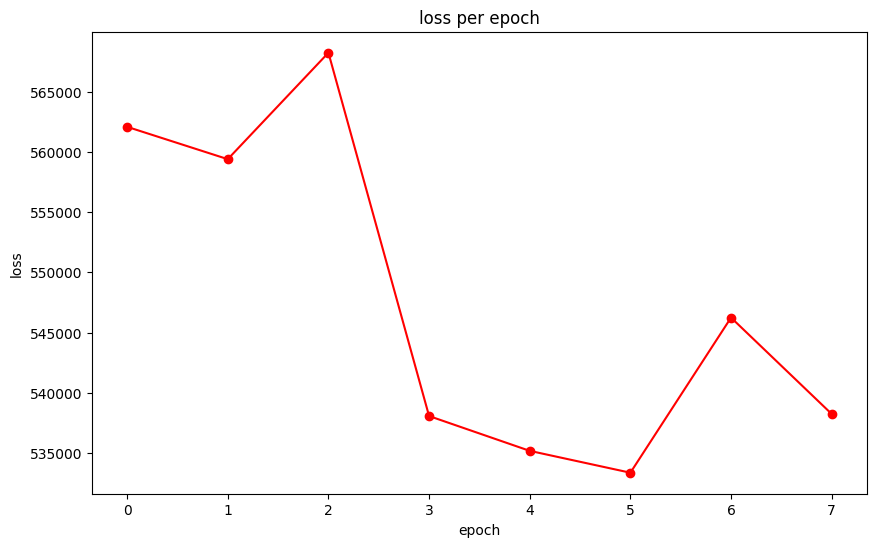

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

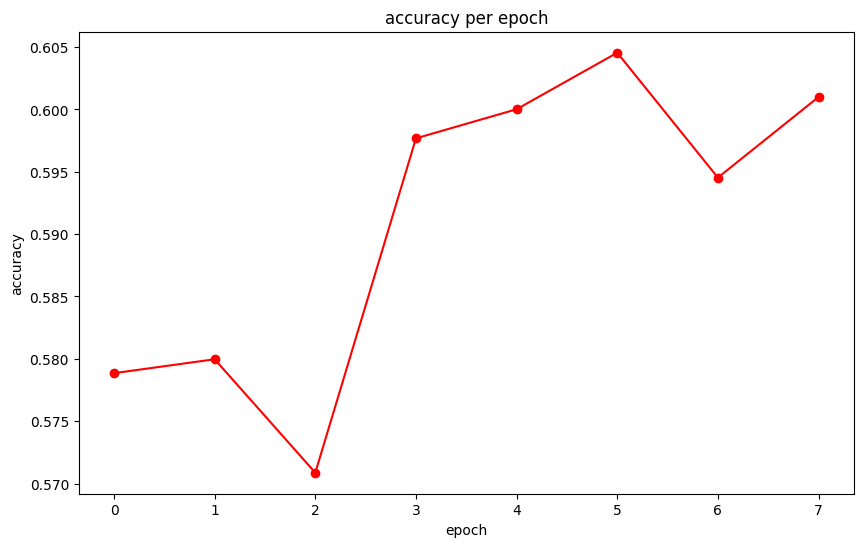

In [29]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

Fashion mnist dataset-cnn model


In [ ]:
width = 28 # width of the image in pixels
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image
class_output = 10 # number of possible classifications for the problem

In [ ]:
# Converting images of the data set to tensors

In [26]:
# [-1,28,28,1]: This specifies the new shape for the tensors.
# -1: This allows TensorFlow to infer the batch size automatically based on the provided data.
# 28: This represents the height of the images (28 pixels).
# 28: This represents the width of the images (28 pixels).
# 1: This represents the number of channels in the images (grayscale images have 1 channel).
x_image_train = tf.reshape(train_images, [-1,28,28,1])
# Normalization: These lines cast the reshaped data (x_image_train and x_image_train) to the float32 data type (single-precision floating-point numbers).
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(test_images, [-1,28,28,1])
x_image_test = tf.cast(x_image_test, 'float32')

#creating new dataset with reshaped inputs
#.batch(50): This configures the dataset to deliver data in batches of 50 examples during training and testing.

train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, train_labels)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, test_labels)).batch(50)

In [31]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
train_labels = tf.slice(train_labels,[0,0],[10000, 10])

In [ ]:
# Defining kernel weight and bias

In [ ]:
# We define a kernel here. The Size of the filter/kernel is 5x5; Input channels is 1 (grayscale); and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 28x28x32). In this step, we create a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]

In [32]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [ ]:
# Change the filter to a 2-D matrix with shape [5*5*1,32]
# Extracts image patches from the input tensor to form a virtual tensor of shape [batch, 28, 28, 5*5*1].
# For each batch, right-multiplies the filter matrix and the image vector.

In [ ]:
# Output:

# A Tensor (a 2-D convolution) of size tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Notice: the output of the first convolution layer is 32 [28x28] images.

In [33]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [55]:
# RElu activation function
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [ ]:
# Apply the max pooling

In [34]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
# Convolutional Layer 2
# Weights and Biases of kernels

In [ ]:
# Filter/kernel: 5x5 (25 pixels)
# Input channels: 32 (from the 1st Conv layer, we had 32 feature maps)
# 64 output feature maps

In [35]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [ ]:
# Convolve image with weight tensor and add biases.

In [36]:
def convolve2(x):
    return(
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [37]:
# Apply the ReLU activation Function
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [ ]:
# Apply the max pooling

In [38]:
# The ksize argument within the tf.nn.max_pool function defines the size of the filter (window) used for performing max pooling in this layer
def conv2(x):
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))
    # it is 64 matrix of [7x7]

In [ ]:
 #Fully Connected Layer

In [ ]:
# Flattening Second Layer

In [52]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [ ]:
# Weights and Biases between layer 2 and 3¶

In [39]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [ ]:
# Matrix Multiplication (applying weights and biases)

In [40]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [ ]:
# Apply the ReLU activation Function

In [41]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [ ]:
# Processing-Drop out layer,to reduce overfitting

In [42]:
# Dropout is a technique used to prevent overfitting in neural networks. During training, it randomly sets a certain percentage of activations (outputs) from neurons to zero. This forces the network to learn more robust features that are not overly reliant on specific neurons.
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

In [ ]:
# Readout Layer (Softmax Layer)

In [43]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for outfits [0,1,2,3,4,5,6,7,8,9]

In [ ]:
# Matrix Multiplication (applying weights and biases)

In [44]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [ ]:
# Apply the Softmax activation Function

In [45]:
def y_CNN(x): return tf.nn.softmax(fc(x))

In [46]:
# define cross entropy
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [47]:
# Define the optimizer

optimizer = tf.keras.optimizers.Adam(1e-4)

In [48]:
# Following the convention of our first example, we will use GradientTape to define a model.
variables = [W_conv1, b_conv1, W_conv2, b_conv2,
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [ ]:
# Define prediction
# to know how many of the cases in a mini-batch has been classified correctly.lets count them.

In [58]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(train_labels, axis=1))
correct_prediction

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [57]:
# Define accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.0907>

In [62]:
import tensorflow as tf

# Assuming you have defined your model `y_CNN(x)`, loss function `cross_entropy`,
# variables `W_conv1`, `b_conv1`, ..., optimizer, `x_image_train`, and `train_labels`

def train_step(x, y):
  """Performs a single training step with gradient descent.

  Args:
    x: Training images (NumPy array).
    y: Training labels (NumPy array).

  Returns:
    The current loss value (float).
  """
  with tf.GradientTape() as tape:
    current_loss = cross_entropy(y, y_CNN(x))
  grads = tape.gradient(current_loss, variables)
  optimizer.apply_gradients(zip(grads, variables))
  return current_loss.numpy()

def get_predictions(x):
  """Predicts class labels for a given input.

  Args:
    x: Input images (NumPy array).

  Returns:
    A NumPy array containing predicted class labels for each image.
  """
  y_pred = tf.argmax(y_CNN(x), axis=1)  # Get class indices
  return y_pred.numpy()  # Convert to NumPy array

# Train the model (assuming you have a training loop)
for epoch in range(epochs):
  # ... training code ...

  # Get predictions on the entire training set
  predictions = get_predictions(x_image_train)

  # Analyze or visualize predictions here
  print(f"Epoch {epoch+1}: Predictions on training data:")
  print(predictions)  # View all predicted class labels



Epoch 1: Predictions on training data:
[9 0 3 ... 0 0 6]


In [60]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0

    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0:
            #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy))

    current_loss = cross_entropy(train_labels, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(train_labels, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 50 loss: 27.60659 accuracy 0.84
epoch  0 batch 100 loss: 19.1913 accuracy 0.88
epoch  0 batch 150 loss: 16.843126 accuracy 0.88
epoch  0 batch 200 loss: 24.428762 accuracy 0.82
epoch  0 batch 250 loss: 23.312895 accuracy 0.72
epoch  0 batch 300 loss: 26.997093 accuracy 0.78
epoch  0 batch 350 loss: 19.891973 accuracy 0.86
epoch  0 batch 400 loss: 25.180908 accuracy 0.76
epoch  0 batch 450 loss: 17.71943 accuracy 0.84
epoch  0 batch 500 loss: 27.21118 accuracy 0.82
epoch  0 batch 550 loss: 20.250792 accuracy 0.82
epoch  0 batch 600 loss: 25.546856 accuracy 0.84
epoch  0 batch 650 loss: 19.04556 accuracy 0.84
epoch  0 batch 700 loss: 24.540255 accuracy 0.9
epoch  0 batch 750 loss: 14.903556 accuracy 0.9
epoch  0 batch 800 loss: 23.969046 accuracy 0.84
epoch  0 batch 850 loss: 18.287804 accuracy 0.86
epoch  0 batch 900 loss: 16.002768 accuracy 0.86
epoch  0 batch 950 loss: 21.515411 accuracy 0.88
epoch  0 batch 1000 loss: 36.490883 accuracy 0.82
epoch  0 batch 1050 loss: 19

In [ ]:
#  predictions on new data you enter from your side using your trained CNN model:

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Assuming you have defined your model `y_CNN(x)` and loaded any necessary weights

def predict_on_new_image(image_path_or_array):
  """Predicts class label for a new image.

  Args:
    image_path_or_array: Path to the image file (str) or a NumPy array representing the image.

  Returns:
    The predicted class label (integer) and the corresponding class name (str).
  """

  if isinstance(image_path_or_array, str):
    # Load image from file
    img = tf.keras.preprocessing.image.load_img(image_path_or_array, target_size=(28, 28), grayscale=True)  # Assuming grayscale Fashion-MNIST
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for model input
    img_array = img_array / 255.0  # Normalize pixel values
  else:
    # Assuming image_path_or_array is already a NumPy array
    img_array = image_path_or_array.reshape((1, 28, 28, 1))  # Reshape for model input
    img_array = img_array / 255.0  # Normalize pixel values

  prediction = tf.argmax(y_CNN(img_array), axis=1).numpy()[0]  # Get the predicted class index
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # Assuming Fashion-MNIST classes
  predicted_class_name = class_names[prediction]

  return prediction, predicted_class_name

img_path = 'C:\Users\singh\OneDrive\Desktop\t-shirt.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), grayscale=True)
# ... rest of your code


# Example usage (replace 'path/to/your/image.jpg' with your actual image path)
prediction, class_name = predict_on_new_image(r'C:\Users\singh\OneDrive\Desktop\t-shirt.jpeg')


# "C:\Users\singh\OneDrive\Desktop\t-shirt.jpeg"

print(f"Predicted class: {prediction} ({class_name})")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-71-94efd1261a63>, line 33)